# Image Processing Assignment
#### DK

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

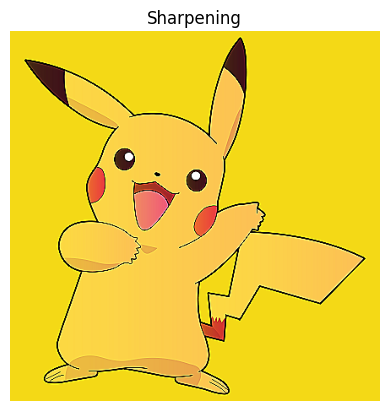

In [18]:
#Pre Processing
import urllib
image_url = "https://mypage114041763.files.wordpress.com/2023/11/1187753.png?resize=438%2C438"
req = urllib.request.urlopen(image_url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
color_image = cv2.imdecode(arr, -1)
image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

#Sharpening
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

sharpened_image = cv2.filter2D(image, -1, kernel)
plt.imshow(sharpened_image)
plt.title("Sharpening")
plt.axis('off')
plt.show()

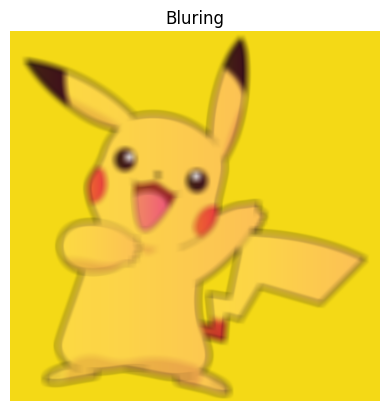

In [19]:
#Pre processing
#Smoothening

averageBlur = cv2.blur(image, (10, 10))
plt.imshow(averageBlur)  
plt.axis('off')
plt.title("Bluring")
plt.show()

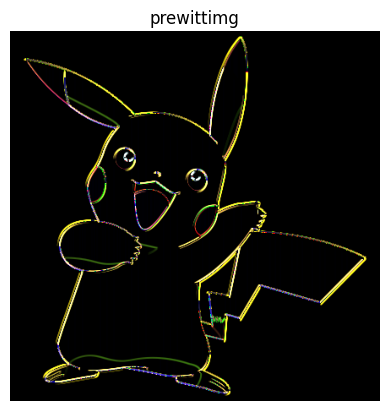

In [20]:
#Edge detection
#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(image, -1, kernelx)
img_prewitty = cv2.filter2D(image, -1, kernely)

prewittimg = img_prewittx + img_prewitty
plt.imshow(prewittimg) 
plt.axis('off')
plt.title('prewittimg')
plt.show()

In [21]:
def is_region_pixel(image, x, y):
    return image[y, x] > 58

In [22]:
def region_growing(image, seed):
    visited = np.zeros_like(image, dtype=np.uint8)
    region = np.zeros_like(image, dtype=np.uint8)
    stack = [seed]
    while stack:
        x, y = stack.pop()
        if visited[y, x] == 1:
            continue
        if is_region_pixel(image, x, y):
            region[y, x] = 255
            visited[y, x] = 1
            if x > 0:
                stack.append((x - 1, y))
            if x < image.shape[1] - 1:
                stack.append((x + 1, y))
            if y > 0:
                stack.append((x, y - 1))
            if y < image.shape[0] - 1:
                stack.append((x, y + 1))
    return region

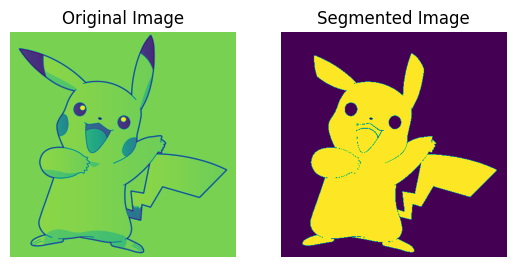

In [23]:
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY) 
seed_x, seed_y = 100, 100
segmented_region = region_growing(gray_image, (seed_x, seed_y))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(gray_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_region)
plt.axis('off')

plt.show()

In [24]:
#Feature extraction
from skimage.feature import hog
from skimage import exposure

orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

features, hog_image = hog(gray_image, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, block_norm='L2-Hys', transform_sqrt=True, feature_vector=True, visualize=True)
features = (features - np.mean(features)) / np.std(features)

if len(features) < 100:
    features = np.pad(features, (0, 100 - len(features)))

features = features[:100]
print("Extracted 100 features:", features)

Extracted 100 features: [-0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105
 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105
 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105
 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105
 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105
 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105
 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105
 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105
 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105
 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105
 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105
 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105
 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105 -0.27408105
 -0.27408105 -0.27408105 -0

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
#Sequential Forward selection
def sfs(X, y, num_features_to_select):
    selected_features = []
    remaining_features = list(range(X.shape[1]))

    for _ in range(num_features_to_select):
        best_accuracy = 0
        best_feature = None

        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_subset = X[:, current_features]

            X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=42)
            model = RandomForestClassifier(n_estimators=100, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature

        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        print(f"Selected feature: {best_feature}, Accuracy: {best_accuracy:.2f}")

    return selected_features

In [31]:
from sklearn.datasets import load_breast_cancer
wine = load_breast_cancer()

X = wine.data
y = wine.target

num_features_to_select = 3
selected_features = sfs(X, y, num_features_to_select)

print("Final selected features:", selected_features)

Selected feature: 27, Accuracy: 0.91
Selected feature: 23, Accuracy: 0.95
Selected feature: 21, Accuracy: 0.96
Final selected features: [27, 23, 21]


In [32]:
#Backward Selection Algorithm
selected_features = list(range(X.shape[1]))

num_features_to_keep = 5

while len(selected_features) > num_features_to_keep:
    best_accuracy = 0
    worst_feature = None

    for feature in selected_features:
        current_features = [f for f in selected_features if f != feature]
        X_subset = X[:, current_features]

        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=42)

        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            worst_feature = feature

    selected_features.remove(worst_feature)
    print(f"Removed feature: {worst_feature}, Accuracy: {best_accuracy:.2f}")

print("Final selected features:", selected_features)

Removed feature: 0, Accuracy: 0.98
Removed feature: 7, Accuracy: 0.98
Removed feature: 24, Accuracy: 0.98
Removed feature: 27, Accuracy: 0.98
Removed feature: 4, Accuracy: 0.98
Removed feature: 6, Accuracy: 0.98
Removed feature: 25, Accuracy: 0.98
Removed feature: 13, Accuracy: 0.99
Removed feature: 5, Accuracy: 0.99
Removed feature: 9, Accuracy: 0.99
Removed feature: 28, Accuracy: 0.99
Removed feature: 1, Accuracy: 0.99
Removed feature: 18, Accuracy: 0.99
Removed feature: 2, Accuracy: 0.98
Removed feature: 3, Accuracy: 0.99
Removed feature: 10, Accuracy: 0.98
Removed feature: 8, Accuracy: 0.98
Removed feature: 11, Accuracy: 0.98
Removed feature: 20, Accuracy: 0.98
Removed feature: 19, Accuracy: 0.98
Removed feature: 22, Accuracy: 0.98
Removed feature: 12, Accuracy: 0.98
Removed feature: 26, Accuracy: 0.99
Removed feature: 15, Accuracy: 0.99
Removed feature: 14, Accuracy: 0.98
Final selected features: [16, 17, 21, 23, 29]


Naive Bayes Accuracy: 0.9649122807017544


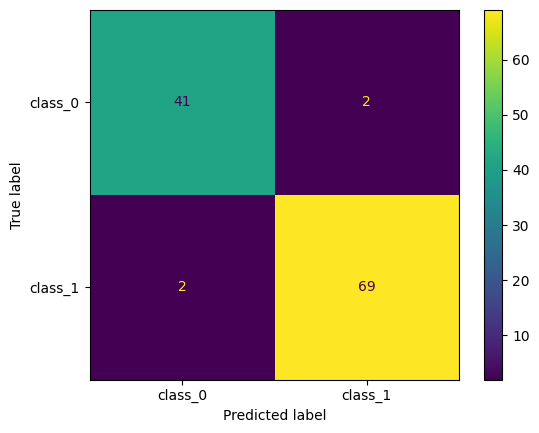

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import metrics
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Classification using Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred)
print(f"Naive Bayes Accuracy: {gnb_accuracy}")
confusion_matrix = metrics.confusion_matrix(y_test, gnb_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class_0', 'class_1'])
cm_display.plot()
plt.show()

KNN Accuracy: 0.9210526315789473


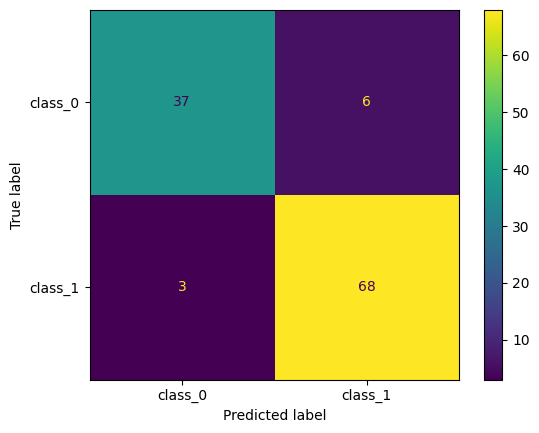

In [36]:
# Classification using KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy}")
confusion_matrix = metrics.confusion_matrix(y_test, knn_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['class_0', 'class_1'])
cm_display.plot()
plt.show()